## Class 10
## Plotting Points data: 311 data 📲 📲 📲 📲 

c4sue NYU @avigailvantu

Today we will continue to work with Pandas and Matplotlib. We will also create some maps using geopandas. Looking into 311 complaints from the past month and from the same period in 2019 we will compare, group and visualize the city’s trends. Along the way we will create a GeoDataFrame, this is a geographical format that is similar enough to a data frame but has an extra dimension of geographical attributes to it.  Think of the times where we loaded a CSV data into QGIS and needed to merge with a swapfile of assign column to a geographical unit.

This week we will be doing something similar, only with that we will transform a csv (which we will read into a data frame) and then assign columns in the data to represent geometry. That would enable us to then visualize the data quite easily. We’ll some pretty simple, yet cool, ways to do so!

In [16]:
pip install geopandas

  Using cached geopandas-0.7.0-py2.py3-none-any.whl (928 kB)
  Using cached pyproj-2.6.0-cp37-cp37m-macosx_10_9_x86_64.whl (11.0 MB)
  Using cached Fiona-1.8.13.post1-cp37-cp37m-macosx_10_9_x86_64.whl (13.9 MB)
  Using cached Shapely-1.7.0-cp37-cp37m-macosx_10_9_x86_64.whl (1.6 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.5.0-py3-none-any.whl (5.7 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

For this assignment I downloaded the 311 data from the NYC Open Data platform. I wanted to look into how people in the city complaint patterns were in the past month. In order to get a relative understating I will compare the data from 2020 to the same dates last year. Comparing similar periods in between years is a common method in highlighting changes and trends.  Thinking about time series, many phenomenas are seasonal. Which is why comparing one month to the previous month (feb 2020 in our case) would be tricker. Having said that, even the same period in two separate years is likely to have some differences, but hopefully less. 

- Data 2020: March 13th 2020-April 13th 2020
- Data 2019: March 13th 2019-April 13th 2019 

Both datasets are in this repo, but you are welcome to download it yourself too 

In [18]:
#load 311 data 1 for this year and one for last year: 

data20 = pd.read_csv('2020.csv')

#load 2019 data 

data19 = pd.read_csv('2019.csv')

/Users/alanlu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/alanlu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data20.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45721304,02/28/2020 08:41:23 PM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,11212.0,2286 STRAUSS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.657856,-73.913547,"(40.65785630457935, -73.91354667249288)"
1,45725757,02/29/2020 01:24:10 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11385.0,1671 SUMMERFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.696029,-73.901214,"(40.69602895219255, -73.90121432325583)"
2,45726541,02/29/2020 09:07:57 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11238.0,200 LEFFERTS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680410,-73.956559,"(40.68040972149559, -73.95655862314575)"
3,45726540,02/29/2020 09:41:30 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11230.0,1910 AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625619,-73.957329,"(40.62561866805388, -73.95732918195414)"
4,45726473,02/29/2020 05:13:10 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,10019.0,435 WEST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768395,-73.986827,"(40.76839487197145, -73.98682654175653)"


In [20]:
data19.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41842452,03/01/2019 12:00:00 AM,03/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,10023,10W WEST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.772659,-73.979323,"(40.77265909494036, -73.97932331414397)"
1,41845294,03/01/2019 12:00:00 AM,03/13/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Parking Lot/Garage,11215,258 8 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670204,-73.986687,"(40.67020384485379, -73.9866873225645)"
2,41845295,03/01/2019 12:00:00 AM,03/05/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10037,WEST 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813102,-73.938481,"(40.81310185734788, -73.93848135637793)"
3,41845297,03/01/2019 12:00:00 AM,03/07/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10128,333 EAST 92 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781317,-73.948058,"(40.78131712272279, -73.94805782860429)"
4,41845941,03/01/2019 12:00:00 AM,03/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,1-2 Family Dwelling,10473,1212 HARDING PARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.809603,-73.858055,"(40.80960272939806, -73.85805465057818)"


In [21]:
print ('shape 2020',data20.shape)
print ('shape 2019',data19.shape)

shape 2020 (265133, 41)
shape 2019 (436675, 41)


What are the changes between 2019 and 2020 data in terms of quantities of non emargency complaints in NYC? 

In [22]:
#What are the columns in the data? 
print ('2020 columns:',data20.columns)
print ('2019 columns:',data19.columns)

2020 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2019 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

# 311 data for 2019 and 2020 data by agency: 

Let's look into the "value_counts" function. That would return the number of values for each value in the Agencey column. Meaning we will get a list of how many complaints were chanaled into each agency. 

Check out this URL for the agencies acronyms
https://www1.nyc.gov/site/mocs/about/agencies-acronyms-initialisms.page

In [23]:
data19['Agency'].value_counts()

NYPD     123481
HPD       90276
DSNY      71072
DOT       49276
DEP       29162
DOB       27042
DPR       13439
DOHMH     10335
DOF        8969
TLC        5105
DCA        2621
DHS        2042
HRA        1626
DFTA       1397
DOE         262
EDC         224
DCAS        140
DOITT        88
ACS          56
TAX          43
NYCEM        13
DCP           3
COIB          2
TAT           1
Name: Agency, dtype: int64

In [24]:
data20['Agency'].value_counts()

NYPD     117684
HPD       45137
DOT       28224
DOB       16486
DCA       15480
DEP       15325
DSNY       9644
DPR        8636
DHS        2632
TLC        2618
DOHMH      1959
EDC         537
DFTA        408
DOE         343
DOITT        20
Name: Agency, dtype: int64

- What are some of the differences in patterns we are seeing in which agencies the calls have been channeled to between 2019 and 2020?  Which agencies have been seeing less activity and which ones more? 

So far we worked mainly with Pandas (also some pyplot, numpy and datetime). In addiition to all these pacakges Pyhton also has some pretty neat geographical features! Let's check out a few of them on our data: 

## From DataFrame to GeoDataFrame 🧮

GeoDataFrame is a data frame that includes one column with a "special" status. This column is the "geometry" column which enbales Python to refer to the data as geogpraphical. In many cases, like in our case, we will not have the "geomtry" column built-in in the data. Instead, we will usually have x any y or Latitue and Longtitude that we will tranform into the needed format. 

To go from DataFRame---> GeoDataFrame:
- we would want to tell python which columns can be used as "geometry". 

Note that the Geometry columns looks like this


- POINT (LON LAT) 

The point() format will be created using the GeoDataFrame function. We will only need to tell Python which columns in the data are each (lon, lat).  


In [25]:
#transform data into geo data frame: 

gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

#note that here we tell Python that the column: 
#data20.Longitude is the longtitute and data20.Latitude is the latitude. 

In [26]:
#check out our GeoDataFrame--> note the "geometry" column was added (all the way to the right)
gdf20.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45721304,02/28/2020 08:41:23 PM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,11212.0,2286 STRAUSS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.657856,-73.913547,"(40.65785630457935, -73.91354667249288)",POINT (-73.91355 40.65786)
1,45725757,02/29/2020 01:24:10 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11385.0,1671 SUMMERFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.696029,-73.901214,"(40.69602895219255, -73.90121432325583)",POINT (-73.90121 40.69603)
2,45726541,02/29/2020 09:07:57 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11238.0,200 LEFFERTS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.680410,-73.956559,"(40.68040972149559, -73.95655862314575)",POINT (-73.95656 40.68041)


## Now we can fianly visualize the data: 

First: plot all points for the layer, not I am setting the marker zise on 0.3 since there are so many of them!! 

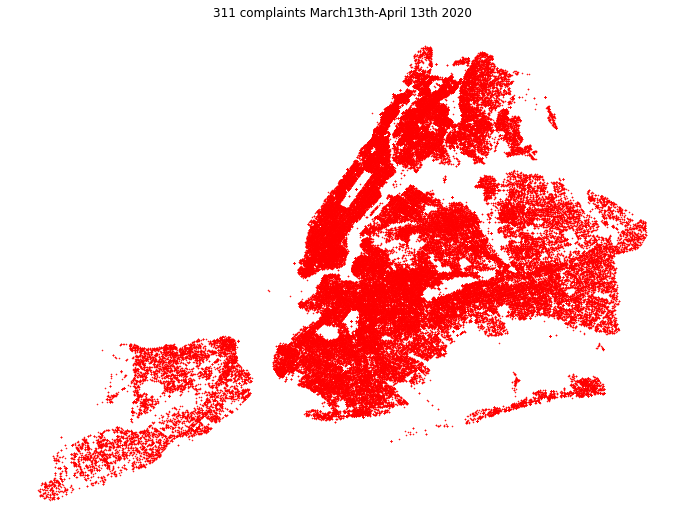

In [27]:
#plot all 2020 data:
gdf20.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2020')
plt.show()

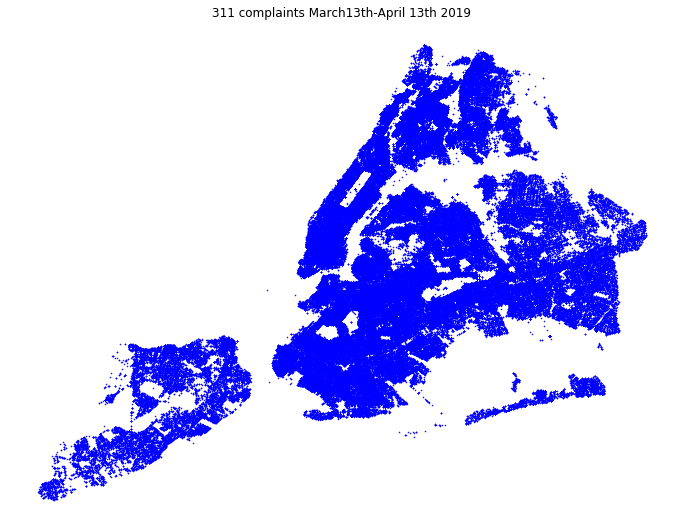

In [28]:
#plot all 2019 data: 
gdf19.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2019')
plt.show()

# Exmine one agency: 
### HPD (Housing Preservation & Development)

In order to make better sense of what are people reporting less in these past weeks, we will take a closer look at the different agencies complaints. 

We will start with HPD: 

In [29]:
#filter only hpd

hpd19 = gdf19.loc[gdf19['Agency']=='HPD']
hpd20 = gdf20.loc[gdf20['Agency']=='HPD']

## Plot HPD data for both 2019 and 2020 

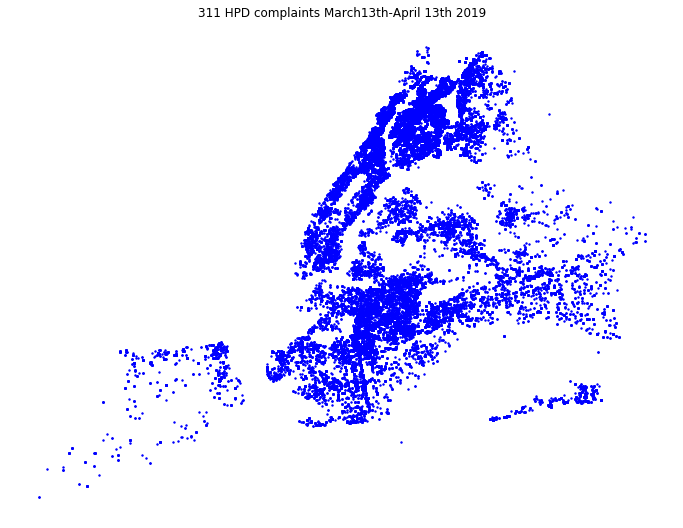

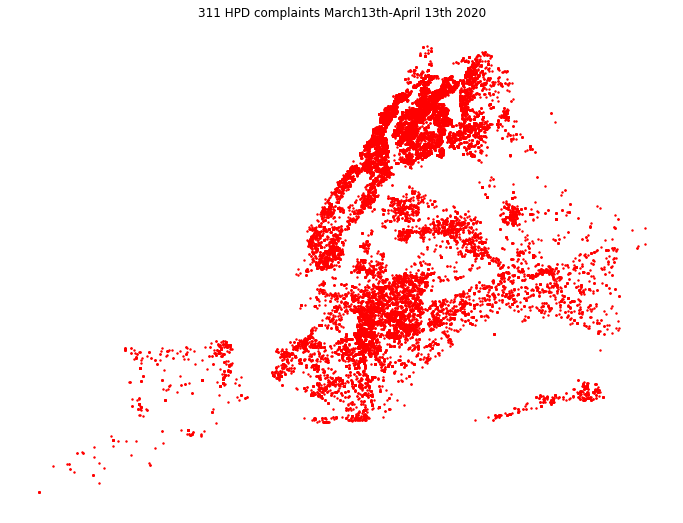

In [30]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()

 Q: Which areas seem to see the most impact in terms of "lost complaints"? 
 
## Another way for us to look into the data is to sub-slice it again: 

Now dive into the complaint types in the HPD complaints. So we can learn what are the types of housing complaint we are seeing. that would also help us compare what were some of the changes b/t both periods

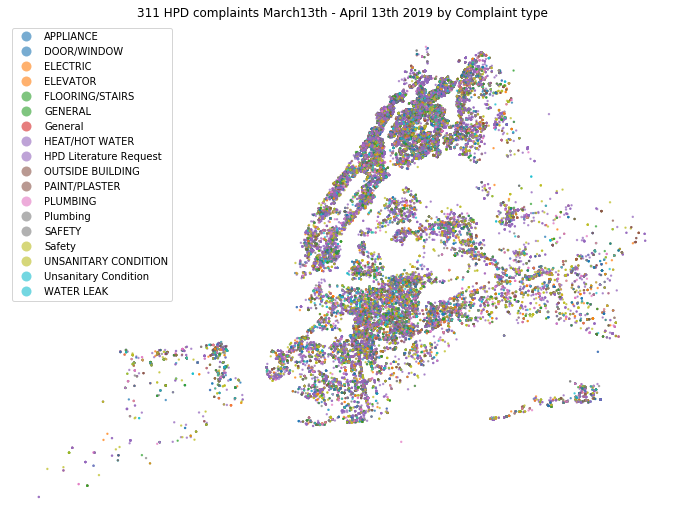

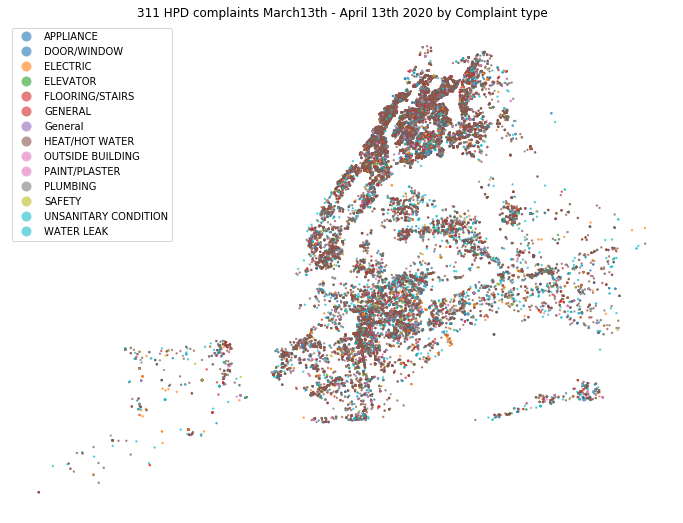

In [31]:
#plot hpd by complaint type:

#1. for 2019 
ax = hpd19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()


#2. for 2020 
ax = hpd20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

What information can we take away from these two maps? 

# Another way to look into the complaint types: 
On top of visualizng the data we can also look into the number of complaints of each type. An easy way to do so is to use the Group.by command. This is a pretty timple command that has a lot of options (more about it on other classes!). 

The main thing to know about group.by right now is that group.by operates on a dataframe so that it basically does 3 main things: 

1. Split : take the data and splits it according to the grouping condition 
2. Apply: calculates what we want it to do: sum, means count etc
3. Combine: it combines the data into new groups 




In [32]:
hpd19['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'PLUMBING', 'WATER LEAK', 'UNSANITARY CONDITION',
       'DOOR/WINDOW', 'HPD Literature Request', 'PAINT/PLASTER',
       'ELECTRIC', 'SAFETY', 'GENERAL', 'FLOORING/STAIRS',
       'OUTSIDE BUILDING', 'ELEVATOR', 'APPLIANCE',
       'Unsanitary Condition', 'General', 'Safety', 'Plumbing'],
      dtype=object)

In our case we will count group by complaint type so that: Python will Split the data according to each type of complaint (hot water, windows etc). Then it will Apply, meaning it would count how many of each compliant type the data has. Finally, Python will Combine the new grouped data. So in our case that would be number of complaints per each complaint type. Note that by doing so, our data frame structure will changes completely so that each row will represent a complaint type, and the data in the cells will be the count of how many of them are there in our data.  All that in one line of code :-) 

In [33]:
#group.by hpd complaints 

#1. for 2019
hpd19_count_type = hpd19.groupby(['Complaint Type']).count()
#1. for 2020
hpd20_count_type = hpd20.groupby(['Complaint Type']).count()

In [34]:
#look at out new data for 2019 
hpd19_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,1916,1916,1912,1916,1916,1916,1916,1916,1916,1916,...,0,0,0,0,0,0,1916,1916,1916,1916
DOOR/WINDOW,5751,5751,5739,5751,5751,5751,5751,5747,5751,5751,...,0,0,0,0,0,0,5747,5747,5747,5751
ELECTRIC,3599,3599,3594,3599,3599,3599,3599,3597,3599,3599,...,0,0,0,0,0,0,3597,3597,3597,3599
ELEVATOR,236,236,236,236,236,236,236,236,236,236,...,0,0,0,0,0,0,236,236,236,236
FLOORING/STAIRS,3945,3945,3930,3945,3945,3945,3945,3943,3945,3945,...,0,0,0,0,0,0,3943,3943,3943,3945


In [35]:
#and for 2020
hpd20_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,728,728,728,728,728,728,728,728,728,728,...,0,0,0,0,0,0,728,728,728,728
DOOR/WINDOW,1526,1526,1526,1526,1526,1526,1526,1525,1526,1526,...,0,0,0,0,0,0,1525,1525,1525,1526
ELECTRIC,1202,1202,1202,1202,1202,1202,1202,1201,1202,1202,...,0,0,0,0,0,0,1201,1201,1201,1202
ELEVATOR,210,210,210,210,210,210,210,210,210,210,...,0,0,0,0,0,0,210,210,210,210
FLOORING/STAIRS,779,779,779,779,779,779,779,779,779,779,...,0,0,0,0,0,0,779,779,779,779


In [36]:
#because the all columns look the same we will remove them and only keep the first one

hpd19_count_type = hpd19_count_type['Unique Key']
hpd20_count_type = hpd20_count_type['Unique Key']


In [37]:
hpd19_count_type.head()

Complaint Type
APPLIANCE          1916
DOOR/WINDOW        5751
ELECTRIC           3599
ELEVATOR            236
FLOORING/STAIRS    3945
Name: Unique Key, dtype: int64

In [38]:
#now let's see the most common HPD complaints for both March/April 2019 and 2020:

# sort data 

hpd19_count_type = hpd19_count_type.sort_values()

hpd20_count_type = hpd20_count_type.sort_values()

In [39]:
#5 most common complaints in 2019 were: 
hpd19_count_type.tail(5)

Complaint Type
DOOR/WINDOW              5751
PLUMBING                 7805
PAINT/PLASTER            9026
UNSANITARY CONDITION    11652
HEAT/HOT WATER          35130
Name: Unique Key, dtype: int64

In [40]:

#5 most common complaints in 2020  were: 
hpd20_count_type.tail(5)

Complaint Type
GENERAL                  1654
PAINT/PLASTER            1882
PLUMBING                 3081
UNSANITARY CONDITION     4535
HEAT/HOT WATER          27646
Name: Unique Key, dtype: int64

 We see that the 5 most common HPD complaints in 2019 and 2020 remained the same. But we are seeing a lot less of many of these types (e.g. more than half less Unsanitary conditions  in 2020 compared to 2019)

## here are the top 5 for both years :
1. Heat/hot water --> 14840 in 2020 and 17742 in 2019 
2. Unsanitary conditions --> 2988 in 2020 and 6218	in 2019 
3. Paint/ Plaster --> 1499 in 2020 and 4661 in 2019 
4. Plumbing --> 2427 in 2020 and 4065 in 2019
5. Door/Window --> 1194 in 2020 and 3001 in 2019 

## Assignment:

Your turn: 

So far we worked on the HPD data. 

We will now divide into groups, when each group will look into another agency complaints: 

# Group 1: NYPD
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY 
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot, summarize and group.by the data for both 2019 and 2020 
 
Deliver:  
- a. What are the patterns in *YOUR* agency complaints between the 2019 and 2020 data? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?

In class: present your main findings. For you homework: submit your jupyter notebook. In addition on your NYU classes submissions write a short summary of your findings. 

Due: April 27th 2020 before class.

In [43]:
#your code... 
hpd19 = gdf19.loc[gdf19['Agency']=='DOHMH']
hpd19.head()
hpd20 = gdf20.loc[gdf19['Agency']=='DOHMH']
hpd20.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45721304,02/28/2020 08:41:23 PM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,11212.0,2286 STRAUSS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.657856,-73.913547,"(40.65785630457935, -73.91354667249288)",POINT (-73.91355 40.65786)
1,45725757,02/29/2020 01:24:10 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11385.0,1671 SUMMERFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.696029,-73.901214,"(40.69602895219255, -73.90121432325583)",POINT (-73.90121 40.69603)
2,45726541,02/29/2020 09:07:57 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11238.0,200 LEFFERTS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.680410,-73.956559,"(40.68040972149559, -73.95655862314575)",POINT (-73.95656 40.68041)
3,45726540,02/29/2020 09:41:30 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,11230.0,1910 AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,40.625619,-73.957329,"(40.62561866805388, -73.95732918195414)",POINT (-73.95733 40.62562)
4,45726473,02/29/2020 05:13:10 AM,03/01/2020 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,10019.0,435 WEST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.768395,-73.986827,"(40.76839487197145, -73.98682654175653)",POINT (-73.98683 40.76839)


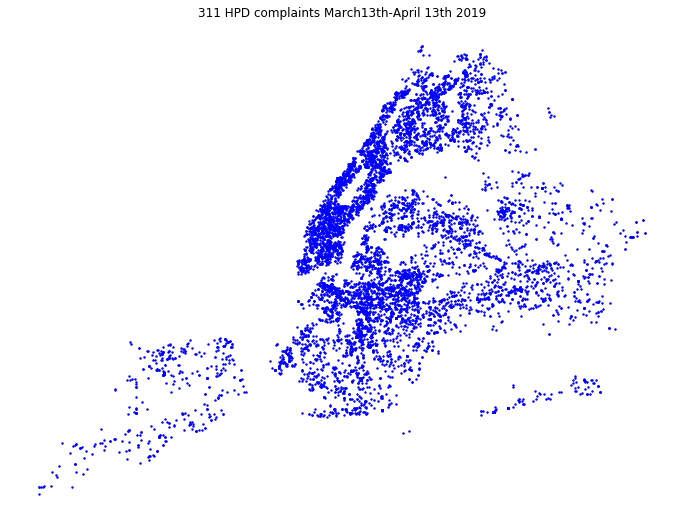

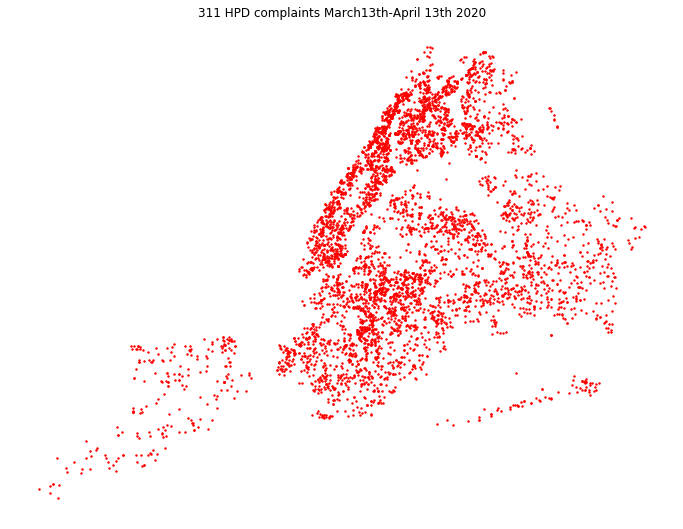

In [44]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()